# Setup Awal

Berbagai library yang umumnya akan kita gunakan, kita panggil dari awal

In [1]:
import sklearn
import math
import numpy as np
import pandas as pd

In [2]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Input Data

Untuk mengambil dataset, disiapkan dari file csv yang sudah disediakan dan membentuk moonset dataset

In [3]:
# Import training data from csv and cleaning the data
training_data = pd.read_csv('el4233-2018-2019-02-klasifikasi-train.csv',index_col=0)
test_data = pd.read_csv('el4233-2018-2019-02-klasifikasi-test.csv',index_col=0)

In [5]:
#Split to corresponding X0,X1 and Y
train_set_X = training_data.drop(['Y'],axis=1)
train_set_Y = training_data['Y']
#valid_set_X = valid_set.drop(['Y','No'],axis=1)
#valid_set_Y = valid_set['Y']

In [6]:
#Checking the preprocessed data
training_data
test_data

,X0,X1
No,,
1000,1.030522,0.892364
1001,1.318739,-0.498590
1002,1.210100,0.498914
1003,-0.644977,1.346281
1004,0.042483,0.550473
1005,-0.886007,0.899231
1006,0.808737,-0.280190
1007,0.998703,0.231264
1008,1.839213,0.062754


# Plot dataset

Untuk mengetahui bagaimana sifat,hubungan tiap fitur, dan persebaran data diperlukan terlebih dahulu dipetakan gambarnya

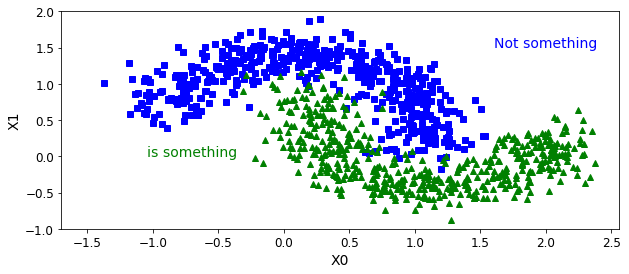

In [7]:
# reset plot
plt.close('all')

plt.figure(figsize=(10, 4))

is_0 = training_data['Y'] == 0
is_1 = training_data['Y'] == 1
training_is_0 = training_data[is_0]
training_is_1 = training_data[is_1]

plt.plot(training_is_0['X0'],training_is_0['X1'],"bs")
plt.plot(training_is_1['X0'],training_is_1['X1'],"g^")
plt.text(2, 1.5, "Not something", fontsize=14, color='b',ha="center")
plt.text(-0.7, 0.0, "is something", fontsize=14, color='g',ha="center")
plt.xlabel("X0", fontsize=14)
plt.ylabel("X1", fontsize=14)
plt.axis([-1.7, 2.56, -1, 2.0])
plt.show()

# Pemodelan (Logarithmic Regression)

Dikarenakan algoritma yang akan digunakan adalah logisticRegresion sementara terdapat kasus yang tidak linearry separable maka perlu ditambahkan fitur

In [8]:
from sklearn.svm import SVC

params = {'kernel':'poly','gamma':'scale'}
svm_clf = SVC(**params)

In [9]:
#Untuk Mencari parameter terbaik digunakan RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_grid =  { 'degree': randint(low=1,high=10), 'C': randint(low=1,high=10), 'coef0': randint(low=0.5,high=2)}

clf = RandomizedSearchCV(svm_clf,param_grid,cv=10,n_iter=20,scoring='neg_mean_squared_error', return_train_score=True,error_score='raise')
clf.fit(train_set_X,train_set_Y)


RandomizedSearchCV(cv=10, error_score='raise',
          estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
          fit_params=None, iid='warn', n_iter=20, n_jobs=None,
          param_distributions={'degree': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000014D411B1BA8>, 'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000014D411B1C18>, 'coef0': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000014D411B1DD8>},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring='neg_mean_squared_error',
          verbose=0)

In [18]:
clf.best_params_

{'C': 9, 'coef0': 1, 'degree': 5}

In [11]:
prediction = clf.predict(test_data)
submission_LogReg = pd.DataFrame(test_data,columns = ['X0','X1','prediksi'],)
submission_LogReg['prediksi'] = prediction
submission_LogReg.to_csv('SubmissionAwal')

# Pemodelan (RandomForestRegressor)

Pada pemodelan kali ini digunakan algoritma RandomForestRegressor. Algoritma ini bekerja dengan menggunakan berbagai decision trees dengan tujuan menciptakan model yang stabil dan memiliki variansi yang rendah

In [20]:
#Construct a regressor obj
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()

In [22]:
#Untuk Mencari parameter terbaik digunakan RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_for =  { 'n_estimators': randint(low=1, high=200),'max_features': randint(low=1, high=2)}
clf = RandomizedSearchCV(forest_reg,param_for,cv=10,n_iter=20,scoring='neg_mean_squared_error', return_train_score=True,error_score='raise')
clf.fit(train_set_X,train_set_Y)


RandomizedSearchCV(cv=10, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=20, n_jobs=None,
          param_distributions={'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000014D4138D9B0>, 'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000014D413C72B0>},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring='neg_mean_squared_error',
          verbose=0)

In [18]:
clf.best_params_

{'C': 9, 'coef0': 1, 'degree': 5}

In [23]:
prediction = clf.predict(test_data)
submission_LogReg = pd.DataFrame(test_data,columns = ['X0','X1','prediksi'],)
submission_LogReg['prediksi'] = prediction
submission_LogReg.to_csv('SubmissionForrest')

#  Additional Information

In [13]:
# Agar Bisa Diuji dilakukan menggunakan library bawaan cross_val_score
from sklearn.model_selection import cross_val_score

scores = cross_val_score(
                        svm_clf, 
                        train_set_X, 
                        train_set_Y,
                        scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

In [14]:
def display_scores(scores):
     print("Scores:", scores)
     print("Mean:", scores.mean())
     print("Standard deviation:", scores.std())

In [15]:
display_scores(rmse_scores)

Scores: [0.34469099 0.24373334 0.28143902 0.33166248 0.2        0.26457513
 0.2        0.33333333 0.26590801 0.24618298]
Mean: 0.27115252879488416
Standard deviation: 0.049611537246788615
